## Agglomerative clustering 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# iris datset 
from sklearn.datasets import load_iris

dic = load_iris()

In [3]:
dic

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# independt feature 
x = pd.DataFrame(dic.data, columns=dic.feature_names)

In [5]:
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train test split 

In [6]:

from sklearn.model_selection import train_test_split

x_train,x_test = train_test_split(x,test_size=0.33,random_state=42)

In [8]:
x_train.shape,x_test.shape

((100, 4), (50, 4))

In [11]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


## standerisation 

In [9]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
x_train_scaled

array([[-0.13835603, -0.26550845,  0.22229072,  0.10894943],
       [ 2.14752625, -0.02631165,  1.61160773,  1.18499319],
       [-0.25866563, -0.02631165,  0.39595535,  0.37796037],
       [-0.8602136 ,  1.16967238, -1.39857913, -1.37061074],
       [ 2.26783585, -0.50470526,  1.66949594,  1.05048772],
       [-0.01804644, -0.74390206,  0.16440251, -0.29456698],
       [-0.739904  ,  0.93047557, -1.39857913, -1.37061074],
       [-0.98052319,  1.16967238, -1.45646733, -1.23610527],
       [-0.8602136 ,  1.88726279, -1.10913808, -1.1015998 ],
       [-0.98052319, -2.4182797 , -0.18292674, -0.29456698],
       [ 0.58350153, -0.74390206,  0.62750818,  0.78147678],
       [-1.22114238,  0.93047557, -1.10913808, -1.37061074],
       [-0.98052319, -0.02631165, -1.28280271, -1.37061074],
       [-0.8602136 ,  0.69127877, -1.2249145 , -0.96709433],
       [-0.25866563, -0.74390206,  0.22229072,  0.10894943],
       [-0.8602136 ,  0.93047557, -1.34069092, -1.37061074],
       [-0.13835603, -0.

## Dimentioanlity reduction (4d-2d)

In [14]:
from sklearn.decomposition import PCA

# model cration 
pca = PCA(n_components=2)

# train the model and convert 
x_train_pca  = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

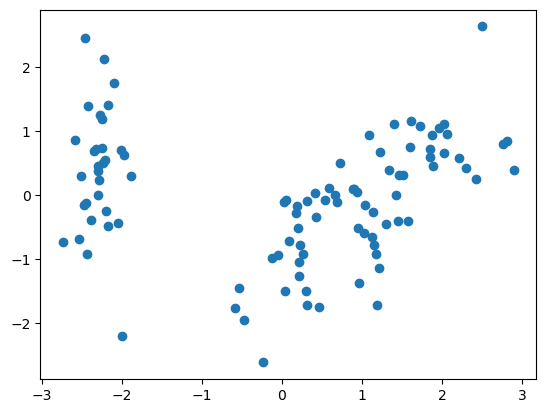

In [16]:
# plot curve between two ffeatures 
plt.scatter(x_train_pca[:,0],x_train_pca[:,1])

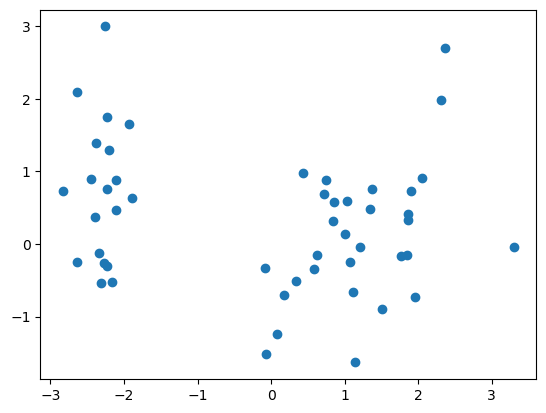

In [17]:
# plot curve between two ffeatures 
plt.scatter(x_test_pca[:,0],x_test_pca[:,1])

In [20]:
# heirerchial clustering 
# agglomerastive clustering 
from sklearn.cluster import AgglomerativeClustering

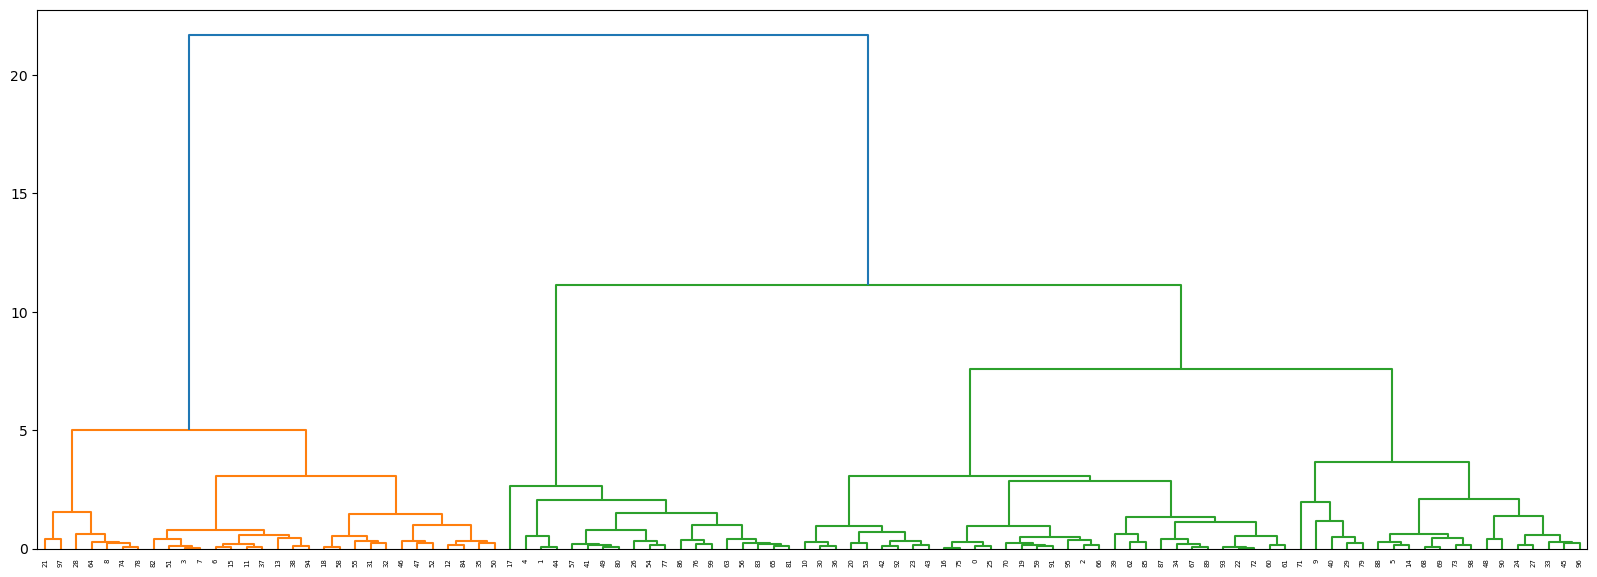

In [23]:
# no of cluster -> dendogram
import scipy.cluster.hierarchy as sc 

# dendogram draw 
plt.figure(figsize=(20,7))
sc.dendrogram(sc.linkage(x_train_pca,method='ward'))
plt.show()

In [25]:
# threshold -> longest verticle line who has no horizontal line passes through 

# no of cluster -> 2 

In [28]:
# model creation 
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [29]:
# train the model 
cluster.fit(x_train_pca)

AgglomerativeClustering(affinity='euclidean')

In [30]:
cluster.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

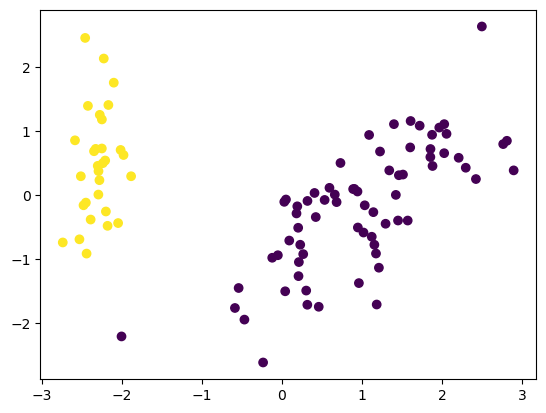

In [31]:
# plot the curve with color laels 
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=cluster.labels_)


In [34]:
# permance metrix 
from sklearn.metrics import silhouette_score

silhouette_score(x_train_pca,cluster.labels_)


0.5962733670285174

In [37]:
# score for different k value 
silhouette=[]
for k in range(2,15):
    model = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    model.fit(x_train_pca)
    silhouette.append(silhouette_score(x_train_pca,model.labels_))
    

In [38]:
silhouette

[0.5962733670285174,
 0.5114770349684075,
 0.4956630994379316,
 0.4510019129627224,
 0.43085794330389404,
 0.41305896462933034,
 0.406440638304992,
 0.39955810340514686,
 0.4063347432179639,
 0.41012364126037654,
 0.40362655085414845,
 0.4104105553269487,
 0.4130830905428374]

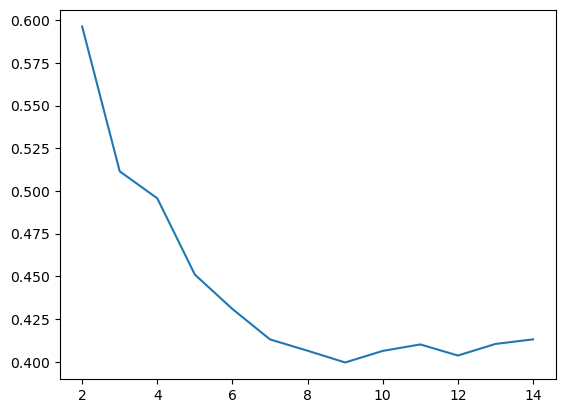

In [39]:
plt.plot(range(2,15),silhouette)